# Repaso Módulo 1 - Optimización.
---

## Primer punto. Optimización de funciones escalares usando `sympy`.

**Enunciado.** Calcular **las dimensiones** del rectángulo de área máxima que puede inscribirse dentro de un semicírculo de radio 2.

Note que **las dimensiones** son base $b = 2x$ y altura $h = y$. Ver la siguiente figura.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

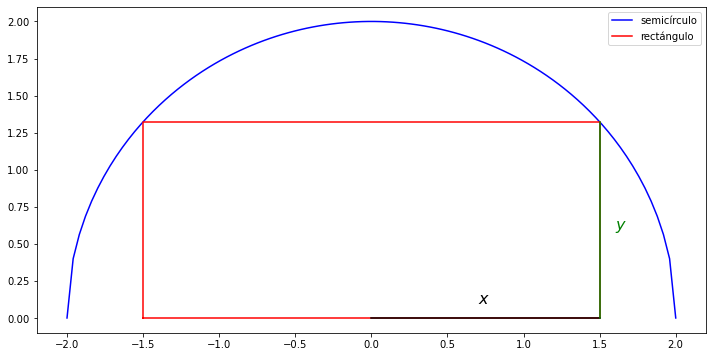

In [2]:
x = np.linspace(-2, 2, 100)
y = np.sqrt(4 - x**2)

xr = [-1.5, -1.5, 1.5, 1.5, -1.5]
yr = [0, np.sqrt(4 - 1.5**2), np.sqrt(4 - 1.5**2), 0, 0]

xx = [0, 1.5]
yx = [0, 0]

xy = [1.5, 1.5]
yy = [0, np.sqrt(4 - 1.5**2)]

plt.figure(figsize = (12, 6))
plt.plot(x, y, 'b', label = 'semicírculo')
plt.plot(xr, yr, 'r', label = 'rectángulo')
plt.plot(xx, yx, 'k')
plt.plot(xy, yy, 'g')
plt.text(0.7, 0.1, '$x$', fontsize = 16)
plt.text(1.6, 0.6, '$y$', fontsize = 16, color = 'g')
plt.legend(loc = 'best')
plt.show()

**Punto 1.** Encuentre el área del rectángulo en función de la variable $x$, $A_R(x)$. También provea el dominio de la función para que tenga sentido.

Realice este punto usando fórmulas en $\LaTeX$, en celdas Markdown.

Sabemos que el área de un rectángulo es base por altura, es decir:

$A_R(x) = b * h = 2x * y $ 

Ahora, como el rectángulo está inscrito en el semicírculo, la altura 𝑦 se puede obtener de la ecuación del semicírculo de radio 2:

$ y = \sqrt{4 - x^2}$

Por lo tanto, la expresión del área en función de 𝑥 será:

$A_R(x) = b * h = 2x * \sqrt{4 - x^2}$

El valor de 𝑥 está limitado por el radio del semicírculo. Como el semicírculo tiene radio 2, los valores posibles de 𝑥 estarán entre −2 y 2, pero, dado que estamos trabajando con un rectángulo, tomaremos solo valores positivos de 𝑥, es decir:

$$ 0 \leq 𝑥 \leq 2 $$

**Punto 2.** Usando `sympy` maximice la función $A_R(x)$ en su dominio.

In [39]:
import sympy as sp

# Definimos la variable simbólica x
x = sp.symbols('x')

# Definimos la función del área A_R(x)
A_R = 2 * x * sp.sqrt(4 - x**2)

#Para maximizar una función, debemos derivarla con respecto a 𝑥 y luego igualar la derivada a 0 para encontrar los puntos críticos.
A_R_maxx = sp.diff(A_R, x)
A_R_maxx

#Ahora vamos a resolver la ecuación A_R_maxx=0 para encontrar los puntos donde el área puede ser máxima.
Pc = sp.solve(A_R_maxx, x)
Pc

#Verificar cuál de ellos corresponde a un máximo evaluando la segunda derivada o probando los valores de A_R en esos puntos.
#Derivamos por segunda vez para verificar el tipo de extremo
A_R_maxx2 = sp.diff(A_R_maxx, x)
A_R_maxx2

#Evaluamos la segunda derivada en los puntos críticos
A_R_maxx2.subs(x, Pc[0])
#Si el resultado es negativo, indica que es un máximo, si es positivo es un mínimo







8

**Punto 3.** ¿Cuáles son las dimensiones $b$ y $h$ del rectángulo resultante?

Con el valor de $𝑥_{max}$ que encontramos al maximizar el área, simplemente sustituimos en la fórmula para la base:

$$𝑏 = 2𝑥$$

In [45]:
b = 2 * Pc[0]
b

-2*sqrt(2)

Ahora para calcular la altura , sustituimos el valor $𝑥_{max}$ en la formula de h:
$$ y = \sqrt{4-x^2}$$

In [54]:
h = sp.sqrt(4 - Pc[0]**2)
h

sqrt(2)

## Segundo punto. Programación lineal.

**Enunciado.** Considere un restaurante que abre los siete días de la semana. Con base en la experiencia, el mínimo número de trabajadores necesarios en cada día de la semana es:

Cada trabajador labora cinco días consecutivos, y luego descansa dos, repitiendo este patrón indefinidamente. Se debe minimizar la cantidad de trabajadores totales en el restaurante.

*Definición de variables*: enumeramos los días del uno al siete (Lunes - 1, Martes - 2, ..., Domingo - 7). Sea $x_i$ el número de trabajadores que empieza su turno de cinco días el día $i$.

**Punto 1.** Escriba la función a minimizar junto con las restricciones, explicando detalladamente cada paso (usando fórmulas en LaTeX, en celdas Markdown). Además escriba el problema en la forma 
\begin{equation}
\begin{array}{ll}
\min_{\boldsymbol{x}} & \boldsymbol{c}^T\boldsymbol{x} \\
\text{s. a. }        & \boldsymbol{A}_{eq}\boldsymbol{x}=\boldsymbol{b}_{eq} \\
                     & \boldsymbol{A}\boldsymbol{x}\leq\boldsymbol{b},
\end{array}
\end{equation}

proporcionando $\boldsymbol{c}$, $\boldsymbol{A}$ y $\boldsymbol{b}$ ($\boldsymbol{A}_{eq}$ y $\boldsymbol{b}_{eq}$, de ser necesario).

**Función Objetivo**

Queremos minimizar el número total de trabajadores contratados. El total de trabajadores es simplemente la suma de todos los
$x_i$

$\sum_{i=1}^{7}x_{i}=x_{1}+x_{2}+x_{3}+x_{4}+x_{5}+x_{6}+x_{7}$

**Restricciones**

Lunes
$x_1+x_4+x_5+x_6+x_7  \geq b_1 $

Martes
$x_1+x_2+x_5+x_6+x_7 \geq b_2$

Miercoles
$x_1+x_2+x_3+x_6+x_7 \geq b_3$

Jueves
$x_1+x_2+x_3+x_4+x_7 \geq b_4$

Viernes
$x_1+x_2+x_3+x_4+x_5 \geq b_5$

Sabado
$x_2+x_3+x_4+x_5+x_6 \geq b_6$

Domingo
$x_3+x_4+x_5+x_6+x_7 \geq b_7$

**1.-Función objetivo**

$C^T x = [1,1,1,1,1,1,1] * x$

**2. Restricciones** (solo desigualdades, no hay restricciones de igualdad):

$A_x \geq b$

**3.- Acomodo**


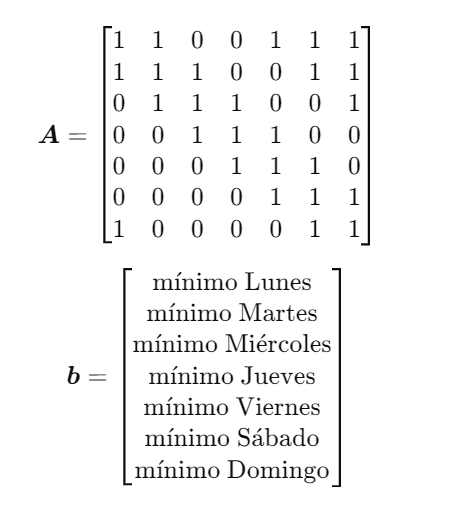

In [2]:
import pandas as pd
import scipy.optimize as opt

In [3]:
df = pd.DataFrame(columns=['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'], index = ['Num_trabajadores'])
df.loc['Num_trabajadores', :] = [14, 13, 15, 16, 19, 18, 11]
df

,Lunes,Martes,Miercoles,Jueves,Viernes,Sábado,Domingo
Num_trabajadores,14,13,15,16,19,18,11


**Punto 2.** Resuelva el problema utilizando la función `linprog`. ¿Cuántos trabajadores son necesarios en total?

In [136]:
import pandas as pd
import scipy.optimize as opt
import numpy as np

#Trabajadores minimos para la semana, empezando de lunes a domingo
b = np.array([
    -14,
    -13,
    -15,
    -16,
    -19,
    -18,
    -11
])

#Coeficientes de x1 a x7
c = np.array([
    1,
    1,
    1,
    1,
    1,
    1,
    1
])

#Coeficientes de las restricciones
A =np.array([
    [-1,0,0,-1,-1,-1,-1], #Lunes
    [-1,-1,0,0,-1,-1,-1], #Martes
    [-1,-1,-1,0,0,-1,-1], #Miercoles
    [-1,-1,-1,-1,0,0,-1], #Jueves
    [-1,-1,-1,-1,-1,0,0], #Viernes
    [0,-1,-1,-1,-1,-1,0], #Sabado
    [0,0,-1,-1,-1,-1,-1], #Domingo
])

sol = opt.linprog(c, A, b, method='highs')

if sol.success:
    total_trabajadores = sol.fun
    num_trabajadores = sol.x
    print(f"Total de trabajadores necesarios: {total_trabajadores}")
    print(f"Número de trabajadores que comienzan su turno: {num_trabajadores}")
else:
    print("El problema no se pudo resolver.")

Total de trabajadores necesarios: 22.0
Número de trabajadores que comienzan su turno: [4. 3. 5. 4. 3. 3. 0.]


## Tercer punto. Regresión lineal.

**Enunciado**. El archivo `Salarios_minimos.csv` contiene datos simplificados de los salarios mínimos desde 1986 a la fecha. La primer columna corresponde a los años, la segunda a dichos salarios. La información completa se encuentra en

https://idconline.mx/laboral/salarios-minimos/salarios-minimos-1986-2007.

**Punto 1.** Importar los datos en un DataFrame de pandas.

In [151]:
import pandas as pd
Salarios_minimos = pd.read_csv("Salarios_minimos.csv")
Salarios_minimos

,Periodo,Salario
0,1988.25,8.00
1,1989.00,8.64
2,1989.50,9.16
3,1990.00,10.08
4,1990.84,11.90
5,1991.84,13.33
6,1993.00,14.27
7,1994.00,15.27
8,1995.00,16.34
9,1995.30,18.30


**Punto 2.** Usando los años como variable independiente $x$ y los salarios mínimos como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3. Es decir:

$$ y_1 = \beta_0 + \beta_1 x $$
$$ y_2 = \beta_0 + \beta_1 x + \beta_2 x^2$$
$$ y_3 = \beta_0 + \beta_1 x + \beta_2 x^2 + + \beta_3 x^3 $$



Mostrar en un solo gráfico los datos del archivo contra los años, y los polinomios ajustados.

Graficar la suma de los errores al cuadrado (RSS) contra el número de términos. ¿Cuál es el polinomio que mejor se ajusta?

**1.- Importar los datos y visualizarlos**

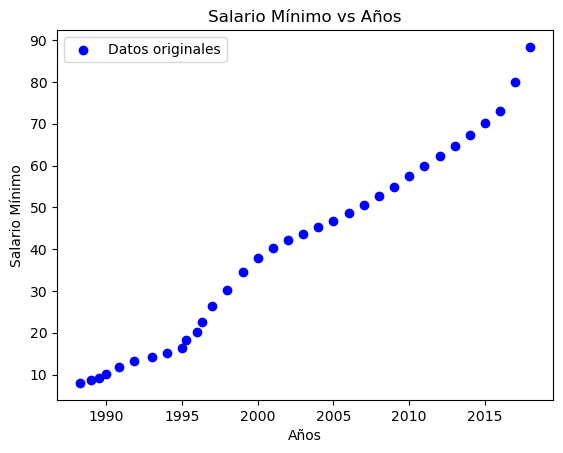

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar el archivo CSV
Salarios_minimos = pd.read_csv("Salarios_minimos.csv")

# Extraer las columnas relevantes
x = Salarios_minimos['Periodo'].values  # Variable independiente (años)
y = Salarios_minimos['Salario'].values  # Variable dependiente (salarios mínimos)

# Graficar los datos
plt.scatter(x, y, color='blue', label='Datos originales')
plt.xlabel('Años')
plt.ylabel('Salario Mínimo')
plt.title('Salario Mínimo vs Años')
plt.legend()
plt.show()


**2.- Ajustar polinomios de grado 1,2 y 3**

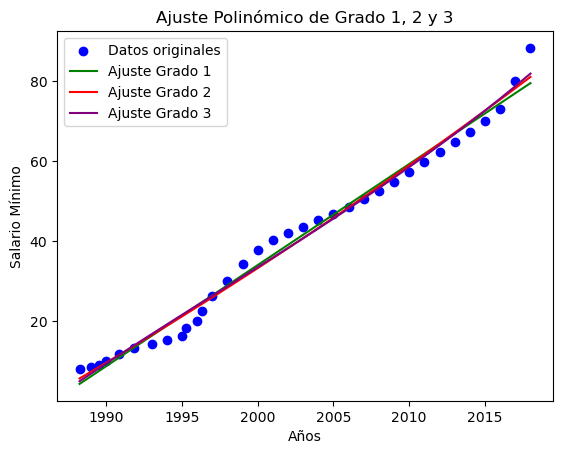

In [162]:
# Ajuste polinómico de grado 1, 2 y 3
coeffs_1 = np.polyfit(x, y, 1)  # Polinomio de grado 1
coeffs_2 = np.polyfit(x, y, 2)  # Polinomio de grado 2
coeffs_3 = np.polyfit(x, y, 3)  # Polinomio de grado 3

# Crear funciones polinómicas
poly_1 = np.poly1d(coeffs_1)
poly_2 = np.poly1d(coeffs_2)
poly_3 = np.poly1d(coeffs_3)

# Generar valores ajustados
y_pred_1 = poly_1(x)
y_pred_2 = poly_2(x)
y_pred_3 = poly_3(x)

# Graficar los polinomios ajustados y los datos originales
plt.scatter(x, y, color='blue', label='Datos originales')
plt.plot(x, y_pred_1, color='green', label='Ajuste Grado 1')
plt.plot(x, y_pred_2, color='red', label='Ajuste Grado 2')
plt.plot(x, y_pred_3, color='purple', label='Ajuste Grado 3')
plt.xlabel('Años')
plt.ylabel('Salario Mínimo')
plt.title('Ajuste Polinómico de Grado 1, 2 y 3')
plt.legend()
plt.show()


**3.- Calcular la suma de los errores al cuadrado (RSS)**

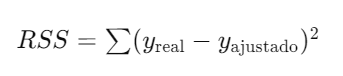

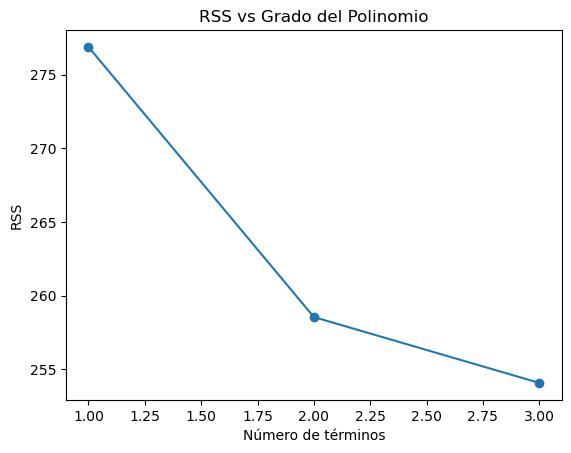

RSS Grado 1: 276.8872208693193
RSS Grado 2: 258.55443748759546
RSS Grado 3: 254.08493252170865


In [166]:
# Calcular el RSS para cada polinomio
rss_1 = np.sum((y - y_pred_1) ** 2)
rss_2 = np.sum((y - y_pred_2) ** 2)
rss_3 = np.sum((y - y_pred_3) ** 2)

# Crear lista de RSS
rss_values = [rss_1, rss_2, rss_3]

# Graficar RSS contra número de términos
plt.plot([1, 2, 3], rss_values, marker='o')
plt.xlabel('Número de términos')
plt.ylabel('RSS')
plt.title('RSS vs Grado del Polinomio')
plt.show()

# Imprimir los valores de RSS
print(f"RSS Grado 1: {rss_1}")
print(f"RSS Grado 2: {rss_2}")
print(f"RSS Grado 3: {rss_3}")

**Punto 3.** Con los polinomios ajustados en el punto anterior, estime el salario mínimo en el año 2019 y compare con el dato real 102.68.

¿Cuál polinomio estima mejor este dato? ¿Es el polinomio que mejor se ajusta? Concluya.

In [169]:
# Año para la estimación
x_2019 = 2019

# Estimar el salario mínimo en 2019 usando cada polinomio
y_est_1 = poly_1(x_2019)
y_est_2 = poly_2(x_2019)
y_est_3 = poly_3(x_2019)

# Valor real
y_real = 102.68

# Imprimir estimaciones y comparaciones
print(f"Salario estimado en 2019 (Grado 1): {y_est_1}")
print(f"Salario estimado en 2019 (Grado 2): {y_est_2}")
print(f"Salario estimado en 2019 (Grado 3): {y_est_3}")
print(f"Salario real en 2019: {y_real}")

# Errores en la estimación
error_1 = abs(y_real - y_est_1)
error_2 = abs(y_real - y_est_2)
error_3 = abs(y_real - y_est_3)

# Imprimir los errores
print(f"Error Grado 1: {error_1}")
print(f"Error Grado 2: {error_2}")
print(f"Error Grado 3: {error_3}")

Salario estimado en 2019 (Grado 1): 82.09377209067497
Salario estimado en 2019 (Grado 2): 83.97216216889501
Salario estimado en 2019 (Grado 3): 85.19043431524187
Salario real en 2019: 102.68
Error Grado 1: 20.586227909325032
Error Grado 2: 18.707837831104996
Error Grado 3: 17.489565684758134


## Cuarto punto. Regresión logística.

**Enunciado**. Ximena vive un poco alejada de la universidad donde estudia y quiere asegurarse de siempre llegar a tiempo. Ha estado registrando la hora a la que sale como minutos relativos a las 7 am. I.e. $x=25$ serían 25 minutos **después** de las 7 am, y $x=-15$ serían 15 minutos **antes** de las 7 am. Además, también registra si llega a tiempo o no. ¿Qué es lo más tarde que puede salir de su casa para tener 70% de probabilidad de llegar a tiempo?



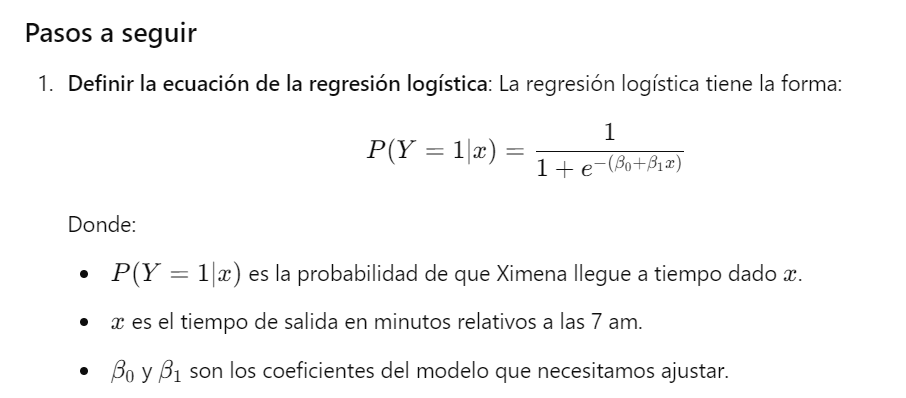

**2.-Ajustar el modelo** usando los datos que Ximena haya registrado (horas de salida y si llega o no a tiempo).

**3.-Calcular el tiempo de salida** que asegura una probabilidad de al menos 70% de llegar a tiempo

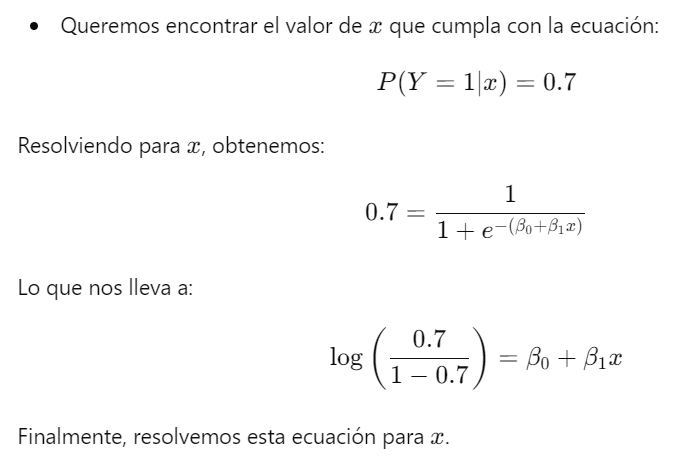

In [189]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np

# Cargar el archivo CSV
file_path = "puntualidad.csv"
data = pd.read_csv(file_path)

# Convertir la columna 'a tiempo' a valores numéricos: 1 para 's' y 0 para 'n'
data['a tiempo'] = data['a tiempo'].map({'s': 1, 'n': 0})

# Definir las variables independientes (X) y dependientes (y)
X = data[['minutos']]
y = data['a tiempo']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Calcular el valor de minutos para una probabilidad de 70%
probabilidad_deseada = 0.7
log_odds = np.log(probabilidad_deseada / (1 - probabilidad_deseada))

# Encontrar el valor de x que corresponde a la probabilidad deseada
minutos_70_prob = (log_odds - model.intercept_[0]) / model.coef_[0][0]

print(f"Para tener una probabilidad del 70% de llegar a tiempo, Ximena debería salir a más tardar {minutos_70_prob:.2f} minutos después de las 7 am.")


Para tener una probabilidad del 70% de llegar a tiempo, Ximena debería salir a más tardar 9.47 minutos después de las 7 am.


In [197]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

# Cargar los datos desde un archivo CSV
# Reemplazar con la ruta correcta del archivo
data = pd.read_csv('puntualidad.csv')

# Convertir la columna 'a tiempo' a valores numéricos (1 para 's' y 0 para 'n')
data['a tiempo'] = data['a tiempo'].apply(lambda x: 1 if x == 's' else 0)

# Definir las variables: 'minutos' como X y 'a tiempo' como y
X = data[['minutos']]
y = data['a tiempo']

# Entrenar el modelo de regresión logística
modelo = LogisticRegression()
modelo.fit(X, y)

# Calcular la probabilidad deseada
probabilidad_deseada = 0.7
log_odds = np.log(probabilidad_deseada / (1 - probabilidad_deseada))

# Calcular el valor de minutos para esa probabilidad
minutos_70_prob = (log_odds - modelo.intercept_[0]) / modelo.coef_[0][0]

# Mostrar el resultado
print(f"Para tener una probabilidad del 70% de llegar a tiempo, Ximena debería salir a más tardar {minutos_70_prob:.2f} minutos después de las 7 am.")


Para tener una probabilidad del 70% de llegar a tiempo, Ximena debería salir a más tardar 7.70 minutos después de las 7 am.
